<a href="https://colab.research.google.com/github/DonRoboto/MOO_v1/blob/main/T2_P1_EA_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
import io
import random
import math
import numpy as np
import scipy, pylab
import matplotlib.pyplot as plt

In [2]:
#cargar archivos de pesos
url = 'https://raw.githubusercontent.com/DonRoboto/MOO_v1/main/knap_250.csv'
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

data = df.columns

n_1 = int(float(str(data[0])))
max_cap_1 = float(str(data[1]))
n_2 = int(float(str(data[2])))
max_cap_2 = float(str(data[3]))

print(n_1)
print(max_cap_1)
print(n_2)
print(max_cap_2)

250
6536.0
250
6489.0


In [3]:

profit_1=df.iloc[:, 0]
weight_1=df.iloc[:, 1]

profit_2=df.iloc[:, 2]
weight_2=df.iloc[:, 3]


In [4]:
class Individuo():
        
    def __init__(self, items_1='', items_2='', n_items_1='', n_items_2='', max_cap_1='', max_cap_2='', w1='', w2=''):
      self.items_1=[]
      self.items_2=[]

      self.n_items_1=n_items_1
      self.max_cap_1=max_cap_1

      self.n_items_2=n_items_2
      self.max_cap_2=max_cap_2

      self.w1=w1
      self.w2=w2

      if items_1!='':
        self.items_1=items_1
        self.items_2=items_2
      else:
        #cromosomas variables
        inx_c1 = random.randint(4, self.n_items_1)
        for i in range(inx_c1):
          pos_1 = random.randint(0, self.n_items_1-1)
          
          if pos_1 not in self.items_1:
            self.items_1.append(pos_1)

        inx_c2 = random.randint(4, self.n_items_2)
        for i in range(inx_c2):
          pos_2 = random.randint(0, self.n_items_2-1)
          
          if pos_2 not in self.items_2:
            self.items_2.append(pos_2)

      #no se debe exceder la capacidad (weight) máxima
      pes1, pes2 = self.pesos()
      while pes1>(self.max_cap_1*self.w1):
        self.items_1.pop()
        pes1, pes2 = self.pesos()

      pes1, pes2 = self.pesos()
      while pes2>(self.max_cap_2*self.w2):
        self.items_2.pop()
        pes1, pes2 = self.pesos()


    def pesos(self):      
      t_weight_1 = 0      
      t_weight_2 = 0

      for i in range(len(self.items_1)):                
        t_weight_1 = t_weight_1 + weight_1[self.items_1[i]]

      for j in range(len(self.items_2)):                
        t_weight_2 = t_weight_2 + weight_2[self.items_2[j]]
        
      return t_weight_1, t_weight_2   


    def profits(self):      
      t_profit_1 = 0      
      t_profit_2 = 0

      for i in range(len(self.items_1)):                
        t_profit_1 = t_profit_1 + profit_1[self.items_1[i]]

      for j in range(len(self.items_2)):                
        t_profit_2 = t_profit_2 + profit_2[self.items_2[j]]
        
      return t_profit_1, t_profit_2  


    def fittnes(self):
      t_profit_1 = 0
      t_weight_1 = 0
      
      t_profit_2 = 0
      t_weight_2 = 0

      t_weight_1, t_weight_2 = self.pesos()
      
      for i in range(len(self.items_1)):        
        t_profit_1 = t_profit_1 + profit_1[self.items_1[i]]

      for i in range(len(self.items_2)):        
        t_profit_2 = t_profit_2 + profit_2[self.items_2[i]]
        
      if (t_weight_1 + t_weight_2) > (max_cap_1 + max_cap_2):
        t_profit = 0
      else:
        t_profit = (t_profit_1 + t_profit_2)

      return t_profit      

In [5]:
class Poblacion():

  def __init__(self, n='', n_items_1='', n_items_2='', max_cap_1='', max_cap_2='', w1='', w2=''):
    self.p = []
    self.n_items_1=n_items_1
    self.n_items_2=n_items_2
    self.max_cap_1=max_cap_1
    self.max_cap_2=max_cap_2
    self.w1=w1
    self.w2=w2
    
    if n!='':
      for i in range(n):
        individuo = Individuo(items_1='', n_items_1=self.n_items_1, n_items_2=self.n_items_2, max_cap_1=self.max_cap_1, max_cap_2=self.max_cap_2, w1=self.w1, w2=self.w2)
        self.p.append(individuo)

  def cruza(self, ind_1, ind_2):
    len_1_1 = math.floor(len(ind_1.items_1)/2)
    len_1_2 = math.floor(len(ind_2.items_1)/2)

    len_2_1 = math.floor(len(ind_1.items_2)/2)
    len_2_2 = math.floor(len(ind_2.items_2)/2)

    crom_1_1 = []
    crom_1_2 = []

    crom_2_1 = []
    crom_2_2 = []

    crom_1_1 = ind_1.items_1[:len_1_1]
    crom_1_2 = ind_2.items_1[:len_1_2]

    crom_2_1 = ind_1.items_2[:len_2_1]
    crom_2_2 = ind_2.items_2[:len_2_2]

    for c1_1 in ind_2.items_1[len_1_2:]:
      if c1_1 not in crom_1_1:
        crom_1_1.append(c1_1)

    for c1_2 in ind_1.items_1[len_1_1:]:
      if c1_2 not in crom_1_2:
        crom_1_2.append(c1_2)

    for c2_1 in ind_2.items_2[len_2_2:]:
      if c2_1 not in crom_2_1:
        crom_2_1.append(c2_1)

    for c2_2 in ind_1.items_2[len_2_1:]:
      if c2_2 not in crom_2_2:
        crom_2_2.append(c2_2)


    h1 = Individuo(items_1=crom_1_1, items_2=crom_1_2, n_items_1=self.n_items_1, n_items_2=self.n_items_2, max_cap_1=self.max_cap_1, max_cap_2=self.max_cap_2, w1=self.w1, w2=self.w2)       
    h2 = Individuo(items_1=crom_2_1, items_2=crom_2_2, n_items_1=self.n_items_1, n_items_2=self.n_items_2, max_cap_1=self.max_cap_1, max_cap_2=self.max_cap_2, w1=self.w1, w2=self.w2) 

    return h1, h2


  def mutacion(self, ind_1):
    len_1 = len(ind_1.items_1)
    index_1 = random.randint(0, len_1)
    pos_1 = random.randint(0, self.n_items_1-1)
    ind_1.items_1[index_1-1]=pos_1
    ind_1.items_1 = list(dict.fromkeys(ind_1.items_1))

    len_2 = len(ind_1.items_2)
    index_2 = random.randint(0, len_2)
    pos_2 = random.randint(0, self.n_items_2-1)
    ind_1.items_2[index_2-1]=pos_2
    ind_1.items_2 = list(dict.fromkeys(ind_1.items_2))


    pes1, pes2 = ind_1.pesos()
    while pes1>self.max_cap_1:
        ind_1.items_1.pop()
        pes1, pes2 = ind_1.pesos()
    
    pes1, pes2 = ind_1.pesos()
    while pes2>self.max_cap_2:
        ind_1.items_2.pop()
        pes1, pes2 = ind_1.pesos()


In [6]:
#crear pesos
pesos_1 = [i/100 for i in range(0, 101)]
pesos_2=[]

for i in range(len(pesos_1)):
  pesos_2.append(round(1-pesos_1[i],2))


In [8]:
#ejecutar 10 veces
result = np.zeros((101, 12))
frente_1 = np.zeros((101, 12))
frente_2 = np.zeros((101, 12))


for n in range(101):
  w1 = pesos_1[n]
  w2 = pesos_2[n]
  #codigo principal
  pob_i = Poblacion(n=12, n_items_1=n_1, n_items_2=n_2, max_cap_1=max_cap_1, max_cap_2=max_cap_2, w1=w1, w2=w2)

  #por cuantas generaciones
  for g in range(20):
    pob_n   = Poblacion(n_items_1=n_1, n_items_2=n_2, max_cap_1=max_cap_1, max_cap_2=max_cap_2, w1=w1, w2=w2)
    pob_aux = Poblacion(n_items_1=n_1, n_items_2=n_2, max_cap_1=max_cap_1, max_cap_2=max_cap_2, w1=w1, w2=w2)

    #seleccionar los que se van a reproducir por torneo binario
    for i in range(0, len(pob_i.p), 2):
      if pob_i.p[i].fittnes()>=pob_i.p[i+1].fittnes():
        pob_aux.p.append(pob_i.p[i])
      else:
        pob_aux.p.append(pob_i.p[i+1]) 

      #quenes serán padres
      pad_1 = Individuo(items_1='',items_2='', n_items_1=n_1, n_items_2=n_2, max_cap_1=max_cap_1, max_cap_2=max_cap_2, w1=w1, w2=w2)
      pad_2 = Individuo(items_1='',items_2='', n_items_1=n_1, n_items_2=n_2, max_cap_1=max_cap_1, max_cap_2=max_cap_2, w1=w1, w2=w2)

    for j in range(0, len(pob_aux.p), 2):
      pad_1 = pob_aux.p[j]
      pad_2 = pob_aux.p[j+1]

      pob_n.p.append(pad_1)
      pob_n.p.append(pad_2)

      #cruza
      h_1, h_2 = pob_n.cruza(pad_1, pad_2)

      #mutacion
      #if random.uniform(0, 1)<0.1:
      #  pob_n.mutacion(h_1)
      #if random.uniform(0, 1)<0.1:
      #  pob_n.mutacion(h_2)

      pob_n.p.append(h_1)
      pob_n.p.append(h_2)

  j=0  
  for k in pob_n.p:
    result[n][j] = k.fittnes()
    j += 1

  j=0  
  for k in pob_n.p:
    f1, f2 =  k.profits()
    frente_1[n][j] = f1
    j += 1
 
  j=0  
  for k in pob_n.p:
    f1, f2 =  k.profits()
    frente_2[n][j] = f2
    j += 1

#print(frente_1)
#print(frente_2)

In [9]:
graph_1=[]
graph_2=[]

for k in range(101):
  graph_1.append(np.nanmax(frente_1[k]))

for k in range(101):
  graph_2.append(np.nanmax(frente_2[k]))


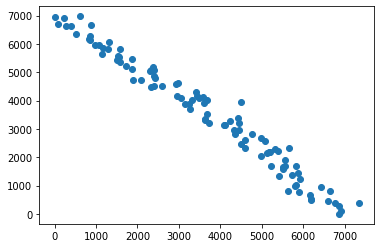

In [11]:
#print(graph_1)
#print(graph_2)

plt.scatter(graph_1, graph_2)
plt.show()